## EDA of chronic kidney disease

* Here is the additional information about the dataset

            age		-	age	
			bp		-	blood pressure
			sg		-	specific gravity
			al		-   	albumin
			su		-	sugar
			rbc		-	red blood cells
			pc		-	pus cell
			pcc		-	pus cell clumps
			ba		-	bacteria
			bgr		-	blood glucose random
			bu		-	blood urea
			sc		-	serum creatinine
			sod		-	sodium
			pot		-	potassium
			hemo		-	hemoglobin
			pcv		-	packed cell volume
			wc		-	white blood cell count
			rc		-	red blood cell count
			htn		-	hypertension
			dm		-	diabetes mellitus
			cad		-	coronary artery disease
			appet		-	appetite
			pe		-	pedal edema
			ane		-	anemia
			class		-	class	

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [15]:
df = pd.read_csv('kidney_disease.csv')

In [16]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [18]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [19]:
# lets see the unique values of categorical column

for column in df.columns:
    if df[column].dtype == 'object':
        print(f'\nUnique Values of {column}')
        print(df[column].unique())


Unique Values of rbc
[nan 'normal' 'abnormal']

Unique Values of pc
['normal' 'abnormal' nan]

Unique Values of pcc
['notpresent' 'present' nan]

Unique Values of ba
['notpresent' 'present' nan]

Unique Values of pcv
['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']

Unique Values of wc
['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11200' '19100' '\t?

In [20]:
# we have some typos(\t) in lets clean them

for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label] = df[label].str.replace('\t', '')

In [21]:
# lets see if we still have some typos

for column in df.columns:
    if df[column].dtype == 'object':
        print(f'\nUnique Values of {column}')
        print(df[column].unique())


Unique Values of rbc
[nan 'normal' 'abnormal']

Unique Values of pc
['normal' 'abnormal' nan]

Unique Values of pcc
['notpresent' 'present' nan]

Unique Values of ba
['notpresent' 'present' nan]

Unique Values of pcv
['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '?' '52' '14' '22' '18' '42' '17' '46' '23' '19'
 '25' '41' '26' '15' '21' '43' '20' '47' '9' '49' '50' '53' '51' '54']

Unique Values of wc
['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '7100' '11800' '9400' '5500' '5800' '13200'
 '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800' '6500'
 '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300' '12400'
 '10500' '4200' '4700' '10900' '8100' '9500' '2200' '12800' '11200'
 '19100' '?' '12300' '16700' '2600' '2640

In [22]:
# we still have typos (?) in pcv, rc, wc lets clean and turn them to numeric

df['pcv'] = df['pcv'].str.replace('?', '')
df['pcv'] = pd.to_numeric(df['pcv'])

df['wc'] = df['wc'].str.replace('?', '')
df['wc'] = pd.to_numeric(df['wc'])

df['rc'] = df['rc'].str.replace('?', '')
df['rc'] = pd.to_numeric(df['rc'])

# dm have spaced yes
df['dm'] = df['dm'].str.replace(' yes', 'yes')

C:\Users\ikhtiar\AppData\Local\Temp\ipykernel_4080\3702218053.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['pcv'] = df['pcv'].str.replace('?', '')
C:\Users\ikhtiar\AppData\Local\Temp\ipykernel_4080\3702218053.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['wc'] = df['wc'].str.replace('?', '')
C:\Users\ikhtiar\AppData\Local\Temp\ipykernel_4080\3702218053.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['rc'] = df['rc'].str.replace('?', '')


In [23]:
# lets see if we still have some typos

for column in df.columns:
    if df[column].dtype == 'object':
        print(f'\nUnique Values of {column}')
        print(df[column].unique())


Unique Values of rbc
[nan 'normal' 'abnormal']

Unique Values of pc
['normal' 'abnormal' nan]

Unique Values of pcc
['notpresent' 'present' nan]

Unique Values of ba
['notpresent' 'present' nan]

Unique Values of htn
['yes' 'no' nan]

Unique Values of dm
['yes' 'no' nan]

Unique Values of cad
['no' 'yes' nan]

Unique Values of appet
['good' 'poor' nan]

Unique Values of pe
['no' 'yes' nan]

Unique Values of ane
['no' 'yes' nan]

Unique Values of classification
['ckd' 'notckd']


In [24]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [39]:
# Now lets Visualize The Categorical column with the target column using heatmap

def cat_visualize(col):
    crosstab = pd.crosstab(df[col], df['classification'])
    print(crosstab)
  
    # Heatmap
    plt.figure(figsize=(5,4))
    sns.heatmap(crosstab, annot=True, cmap='coolwarm', fmt='d')
    plt.title(f'Heatmap: {col} X classification')
    plt.show()

classification  ckd  notckd
rbc                        
abnormal         47       0
normal           60     141


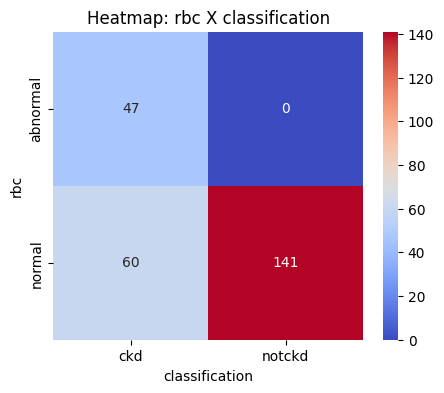

classification  ckd  notckd
pc                         
abnormal         76       0
normal          118     141


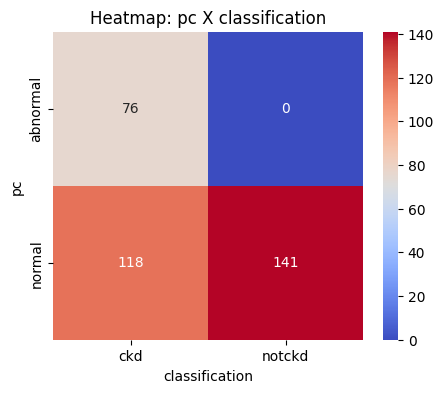

classification  ckd  notckd
pcc                        
notpresent      208     146
present          42       0


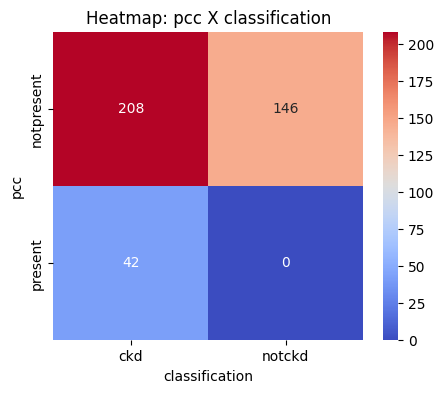

classification  ckd  notckd
ba                         
notpresent      228     146
present          22       0


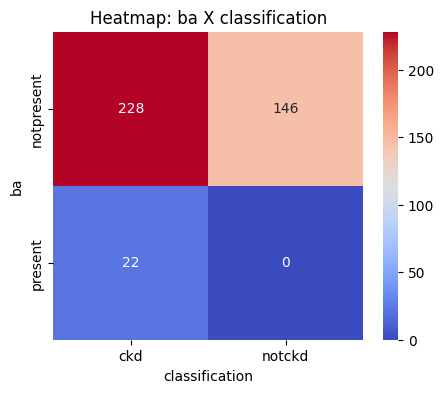

classification  ckd  notckd
htn                        
no              103     148
yes             147       0


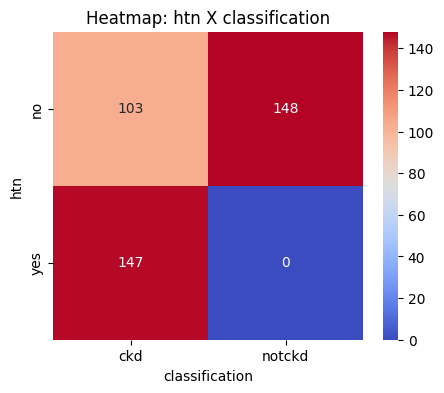

classification  ckd  notckd
dm                         
no              113     148
yes             137       0


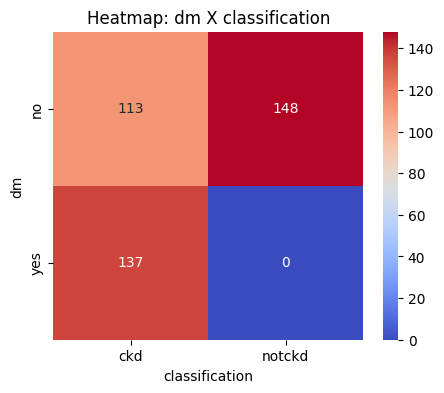

classification  ckd  notckd
cad                        
no              216     148
yes              34       0


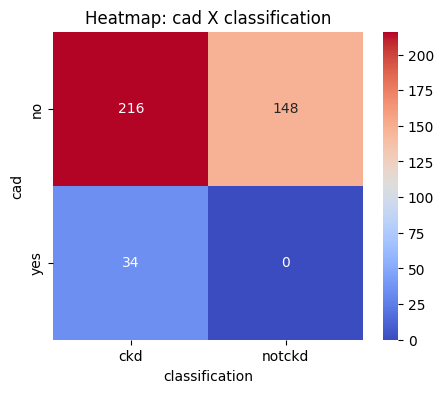

classification  ckd  notckd
appet                      
good            168     149
poor             82       0


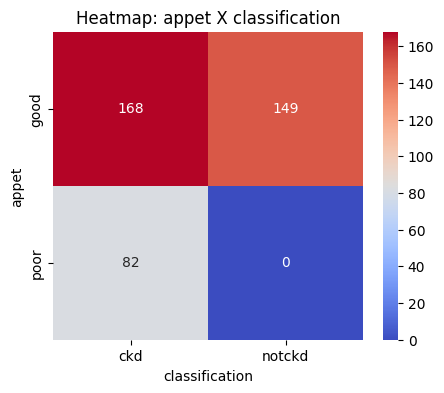

classification  ckd  notckd
pe                         
no              174     149
yes              76       0


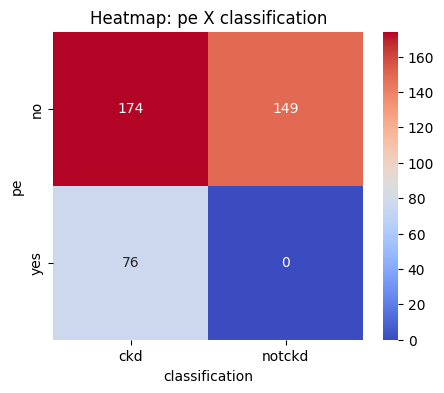

classification  ckd  notckd
ane                        
no              190     149
yes              60       0


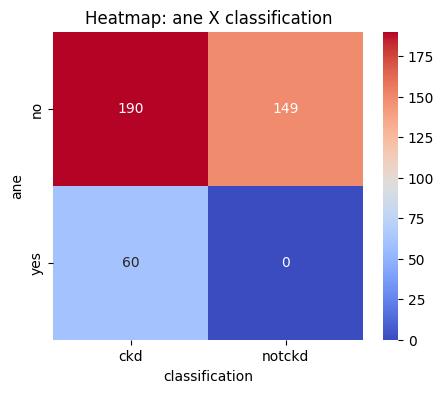

In [40]:
for column in df.columns:
    if df[column].dtype == 'object':
        if column == 'classification':
            continue
        cat_visualize(column)

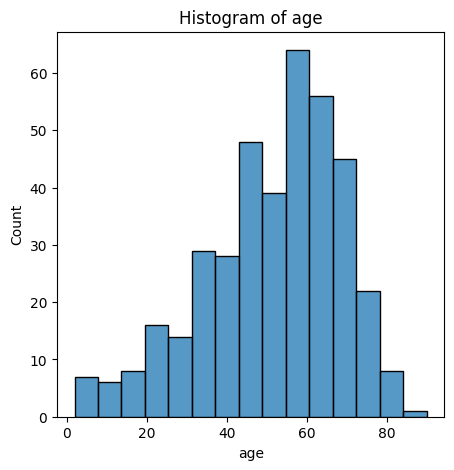

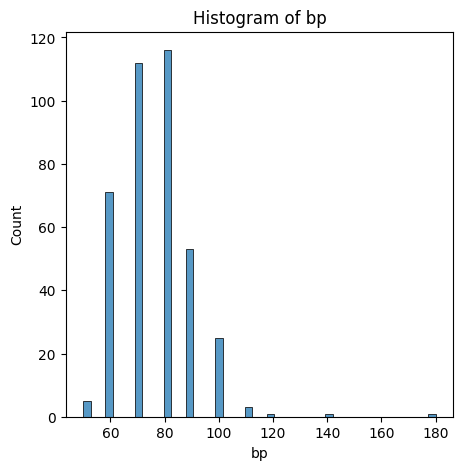

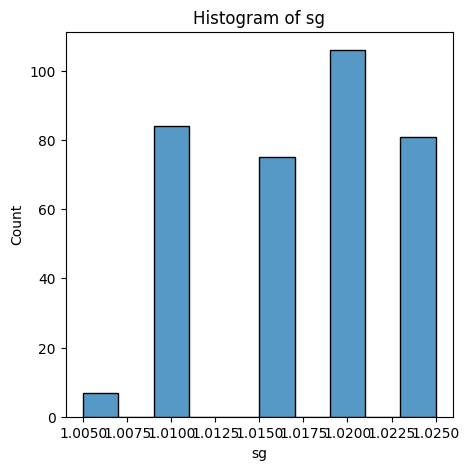

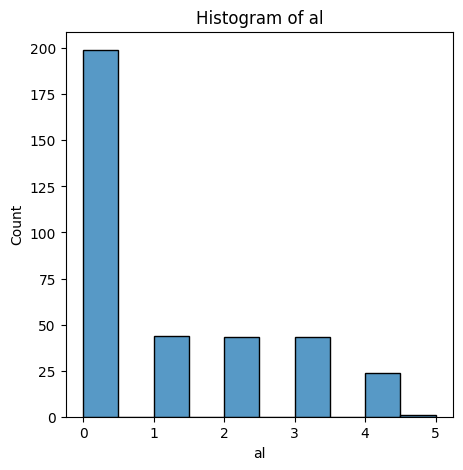

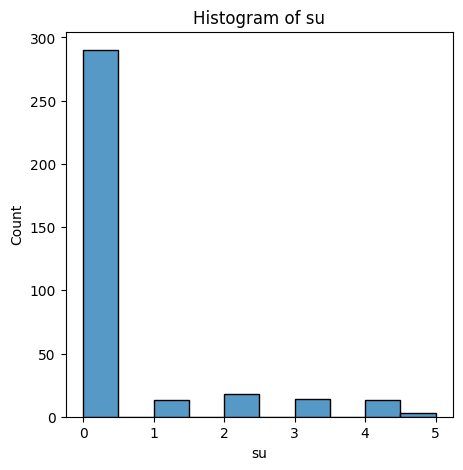

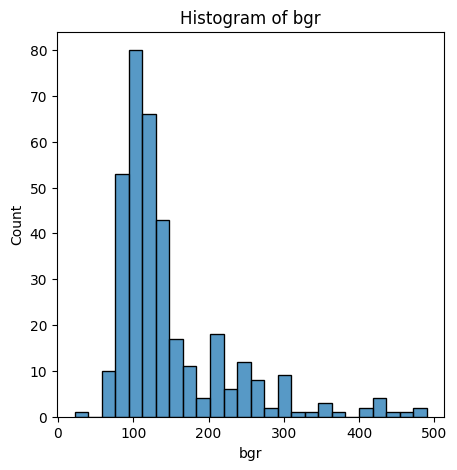

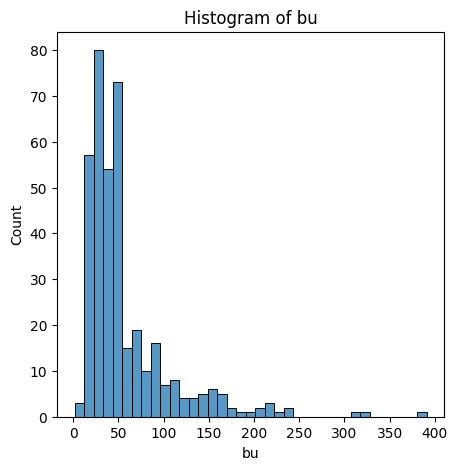

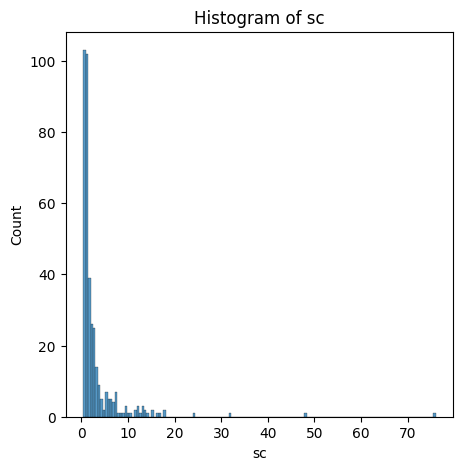

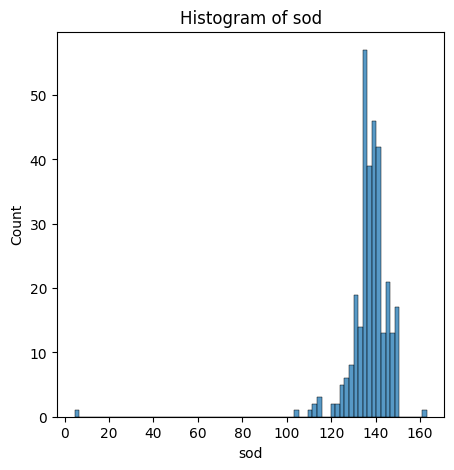

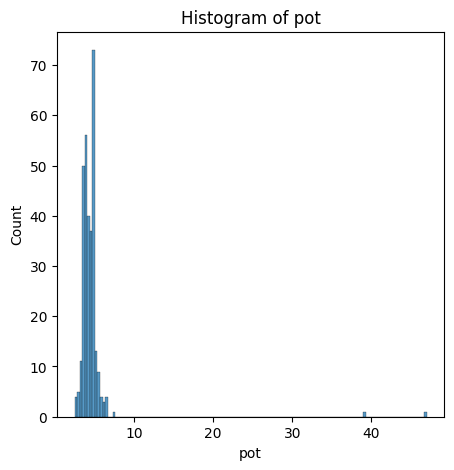

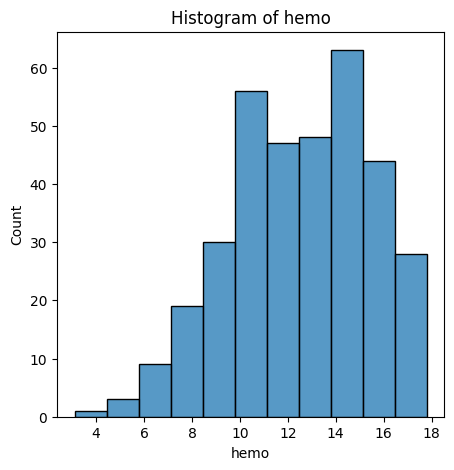

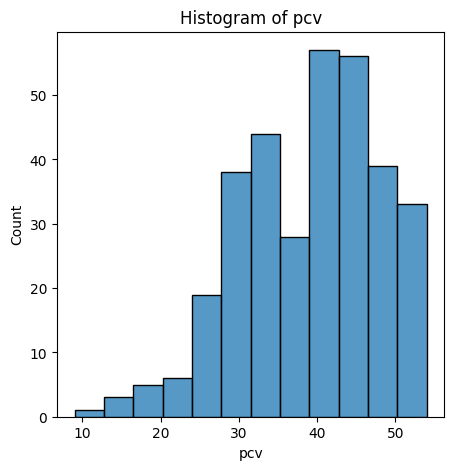

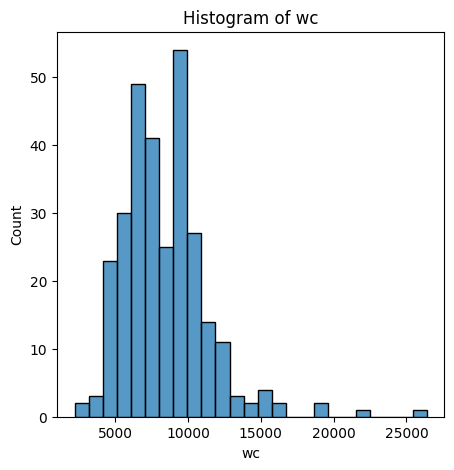

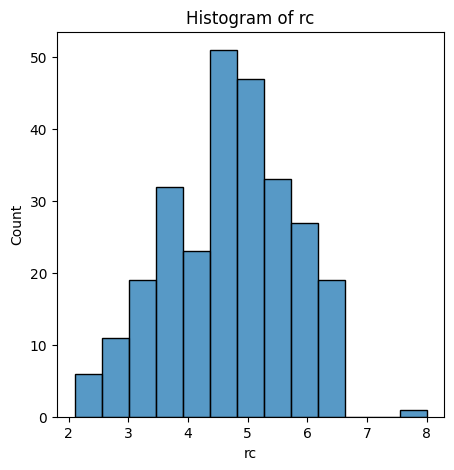

In [36]:
# now lets visualize the numeric data distribution

for column in df.columns:
    if df[column].dtype != 'object':
        if column == 'id':
            continue
        plt.figure(figsize=(5,5))
        sns.histplot(df[column])
        plt.title(f'Histogram of {column}')
        plt.show()

In [54]:
# Lets plot scatterplot with respect to classification

def plot_scatter(col1, col2):
    plt.figure(figsize=(6,6))
    sns.scatterplot(data=df, x=col1, y=col2, hue='classification')
    plt.title(f'Scatterplot: {col1} X {col2} with respect classification')
    plt.show()

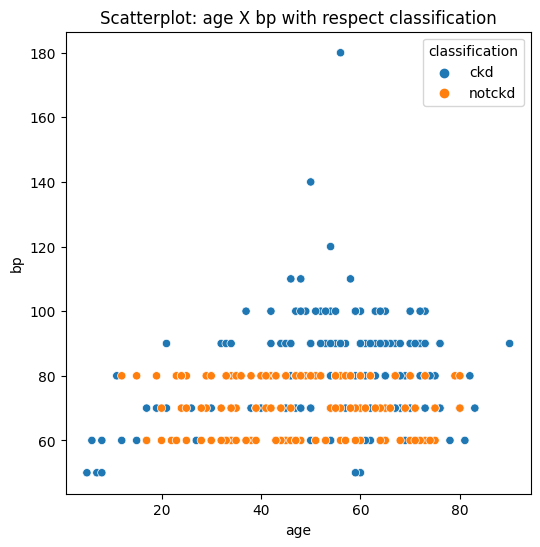

In [55]:
plot_scatter('age', 'bp')

Higher bp(Blood Pressure) age range(50-70) most likely to have disease

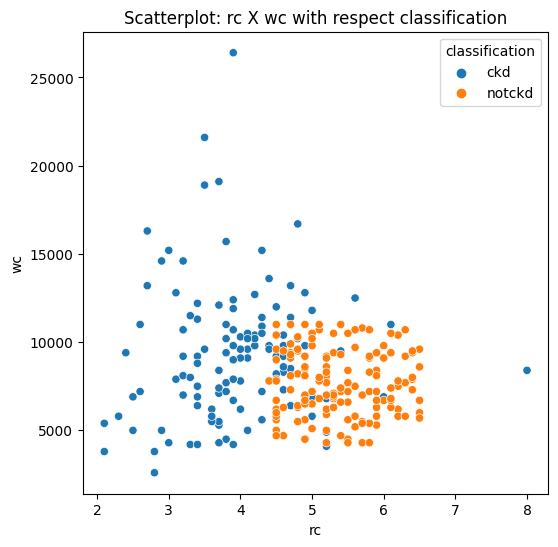

In [44]:
plot_scatter('rc','wc')

Lower red blood cell count and lower blood cell count will mostly have the disease

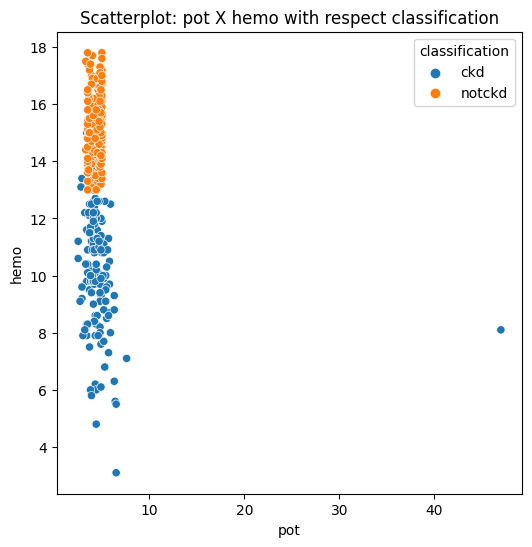

In [45]:
plot_scatter('pot','hemo')

Lower hemoglobin and potassium has the disease

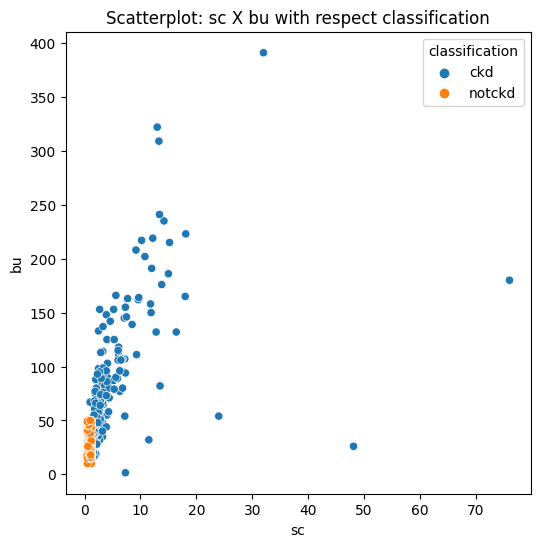

In [46]:
plot_scatter('sc','bu')

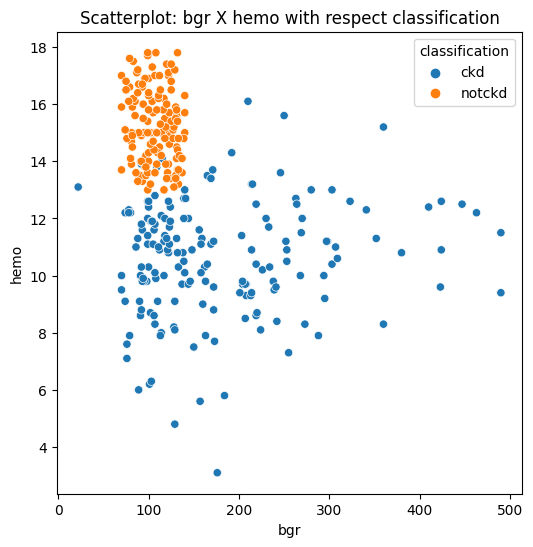

In [47]:
plot_scatter('bgr','hemo')

 in case of hemoglobin and blood glucose hemoglobin have a important role incase of identifing disease

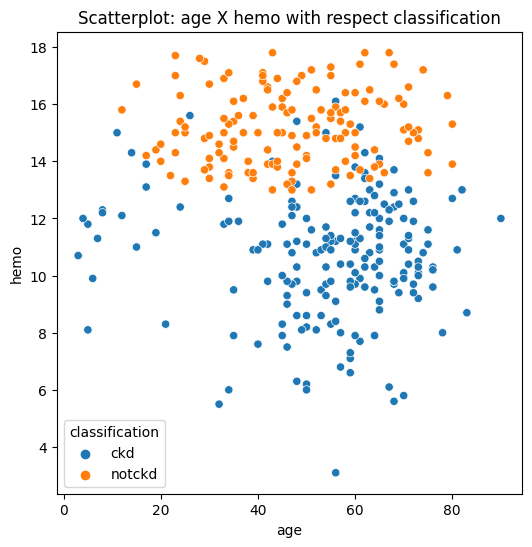

In [50]:
plot_scatter('age','hemo')

from 50 to 70 age range the hemoglobin is tend to become less and the chance of disease gets high

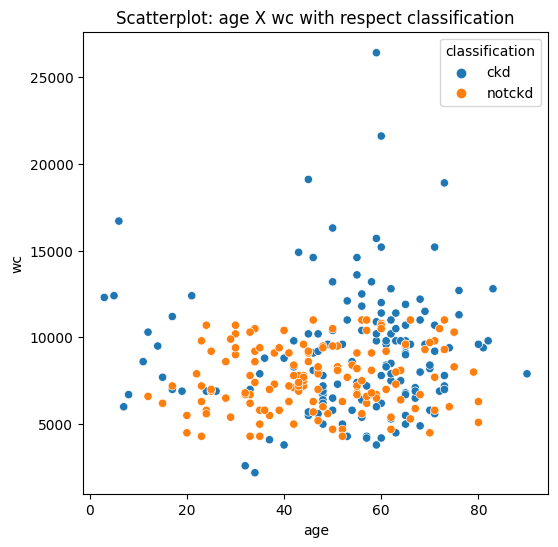

In [51]:
plot_scatter('age', 'wc')

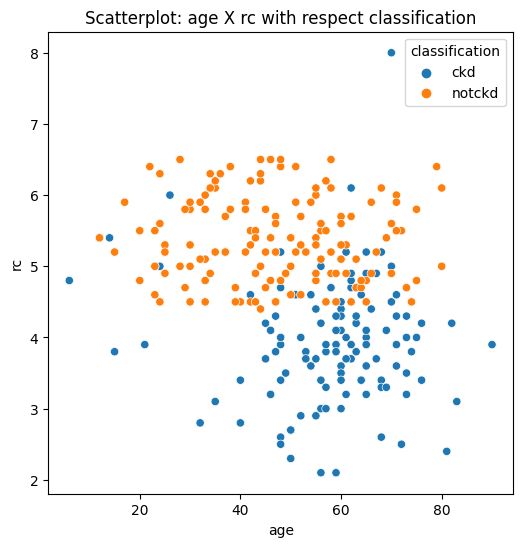

In [56]:
plot_scatter('age','rc')

Here we could say the red blood cell count decrease as the age increse but in the white blood cell count we did not see this trend

In [60]:
def plot_bar(col1, col2):
    sns.barplot(data=df, x=col1, y=col2, hue='classification')
    plt.title(f'Barplot: {col1} X {col2}')
    plt.show()

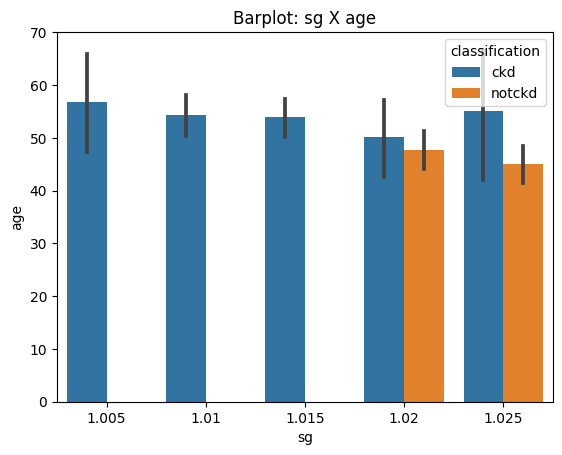

In [61]:
plot_bar('sg','age')

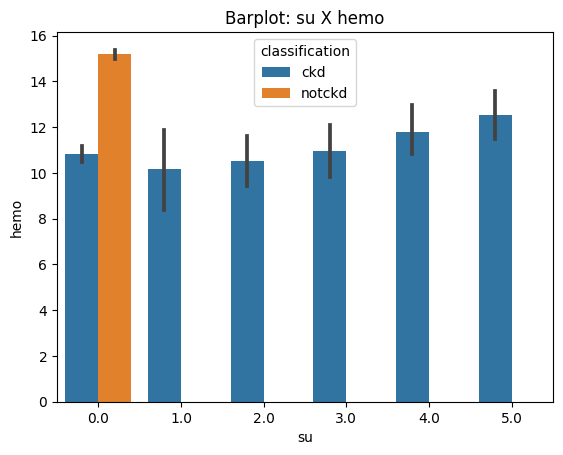

In [62]:
plot_bar('su', 'hemo')

F:\Anaconda\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


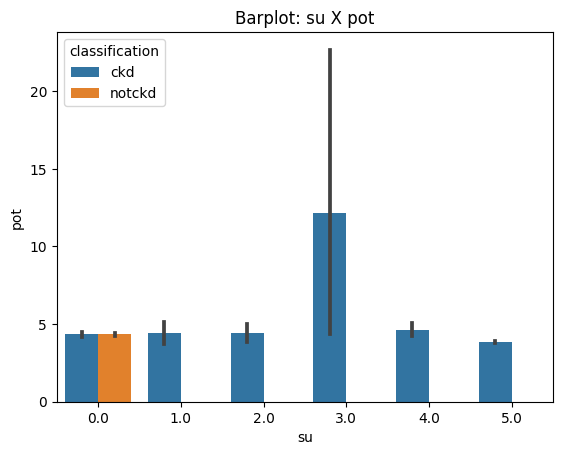

In [63]:
plot_bar('su','pot')

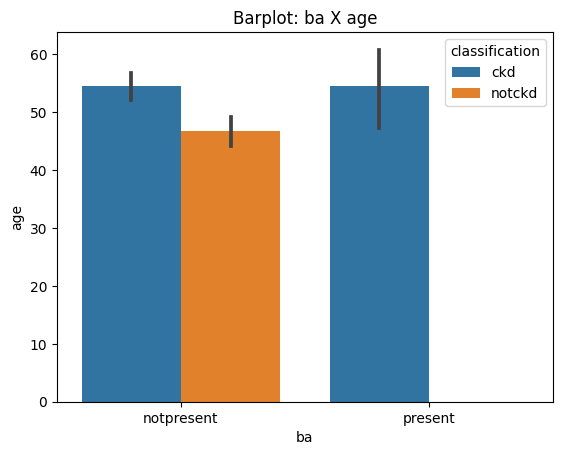

In [64]:
plot_bar('ba','age')

In [65]:
def plot_box(col1, col2):
    sns.boxplot(data=df, x=col1, y=col2, hue='classification')
    plt.title(f'Barplot: {col1} X {col2}')
    plt.show()

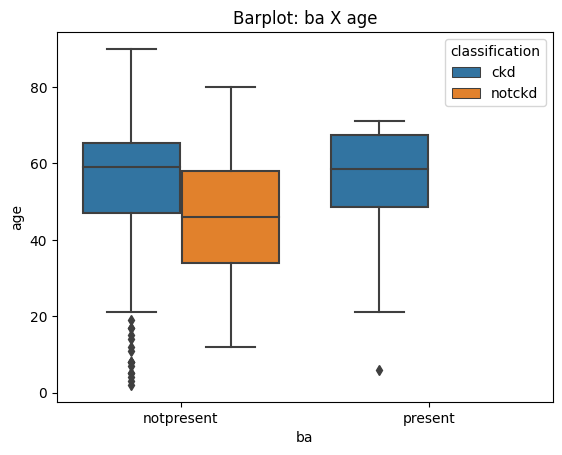

In [66]:
plot_box('ba', 'age')

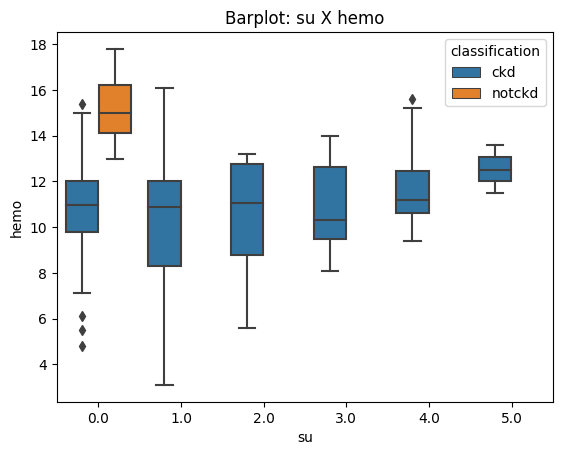

In [67]:
plot_box('su','hemo')

who has the sugar from 1 to 3 has medium hemoglobin and chronic kidney disease

In [68]:
# lets transform the classification column from categorical to numerical 
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Encoded_class'] = encoder.fit_transform(df['classification'])

# view the encoded class
df[['classification','Encoded_class']].value_counts()

classification  Encoded_class
ckd             0                250
notckd          1                150
dtype: int64

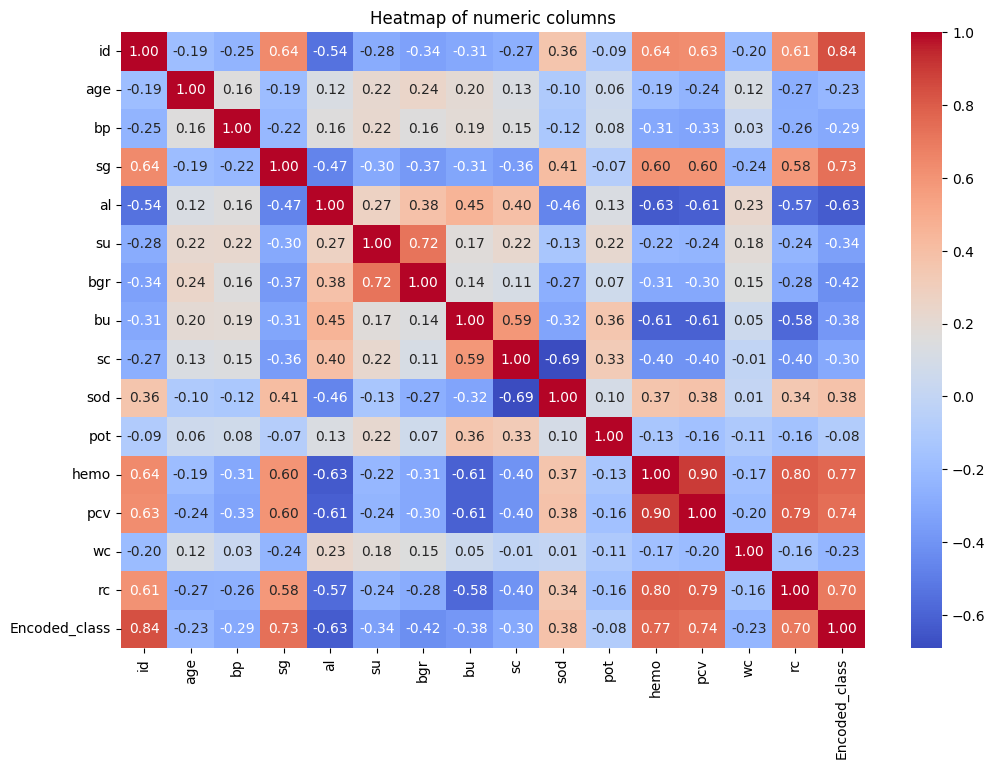

In [70]:
# Lastly Lets make a correlation matrix
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of numeric columns')
plt.show()